In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
# import csv file

df=pd.read_csv('housing.csv')

In [3]:
# Info of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


* There are a few null values in the 'total_bedrooms' columns.

In [4]:
# Deleting null values

df.dropna(inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [6]:
# Top 5 rows of the dataset

df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


#### Plot to View the Average Median Age Across All Locations

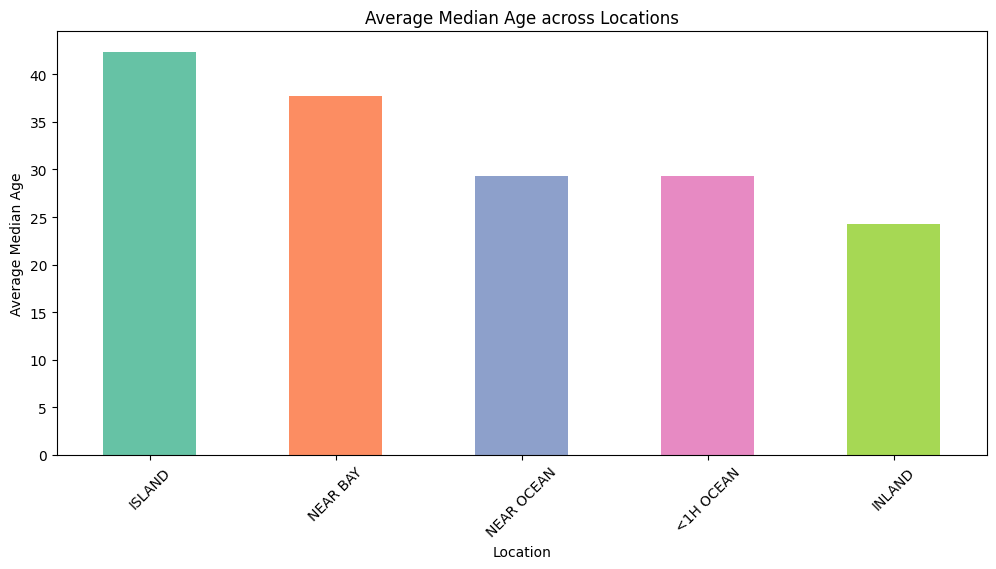

In [7]:
plt.figure(figsize=(12,5.5))
colors = plt.cm.Set2(range(len(df['ocean_proximity'].unique())))  # To assign a different color for each category
df.groupby('ocean_proximity')['housing_median_age'].mean().sort_values(ascending=False).plot(kind='bar',color=colors)
plt.title('Average Median Age across Locations')
plt.xlabel('Location')
plt.ylabel('Average Median Age')
plt.xticks(rotation=45)
plt.show();

* According to the graph, the average median age of residents on the island is the greatest, while that of residents in inland areas is the lowest. 

#### Plot to view the geographical distribution

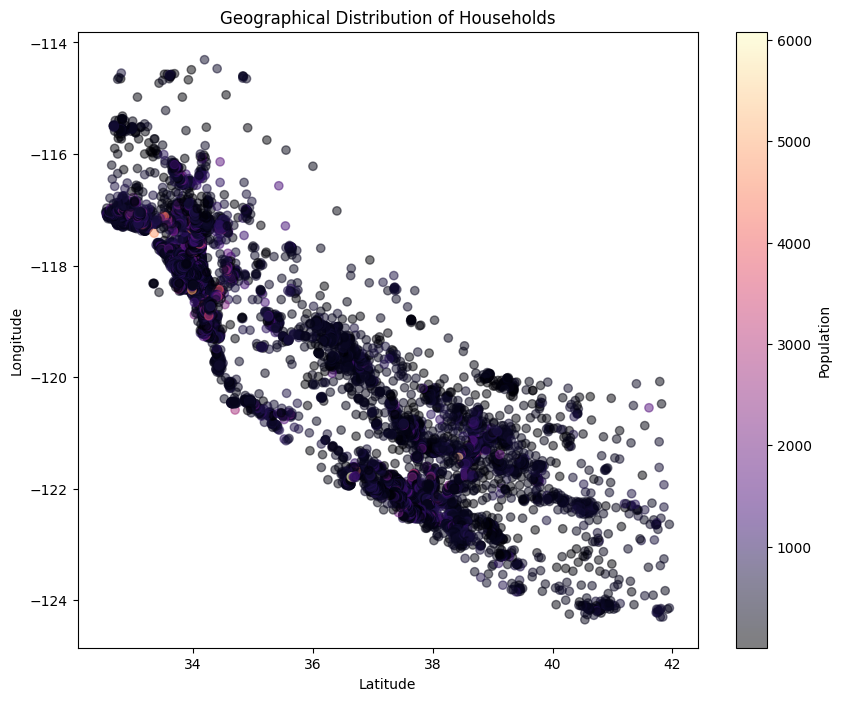

In [8]:
plt.figure(figsize=(10, 8))
plt.scatter(df['latitude'], df['longitude'], c=df['households'], cmap='magma', alpha=0.5)
plt.colorbar(label='Population')
plt.title('Geographical Distribution of Households')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

* The visual explains that the majority of households are located on the coast.
* The population is less in areas that are away from the coast.

#### Machine Learning

In [9]:
# Importing necessary libraries from scikit-learn for data splitting

from sklearn.model_selection import train_test_split

In [10]:
# Median house value is the target variable
# Separating features (X) and target variable (y)

X=df.drop(['median_house_value'],axis=1)
y=df['median_house_value']

In [11]:
# Splitting the data into training and testing sets

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2) # test_size=0.2 indicates that 20% of the data will be used for testing, and 80% for training

In [12]:
# Combining features and target variable back into a training DataFrame

train_data=X_train.join(y_train)

In [13]:
train_data.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
3732,-118.41,34.18,30.0,2008.0,513.0,1052.0,496.0,3.0119,<1H OCEAN,262200.0
15578,-116.90,33.03,11.0,3213.0,634.0,1975.0,579.0,3.4750,<1H OCEAN,167200.0
18116,-122.02,37.30,32.0,2134.0,328.0,903.0,322.0,6.3590,<1H OCEAN,341900.0
119,-122.23,37.84,47.0,3175.0,454.0,1098.0,485.0,5.2868,NEAR BAY,347600.0
3312,-122.70,38.97,17.0,2554.0,540.0,723.0,319.0,3.2375,INLAND,114200.0


#### Correlation between different variables

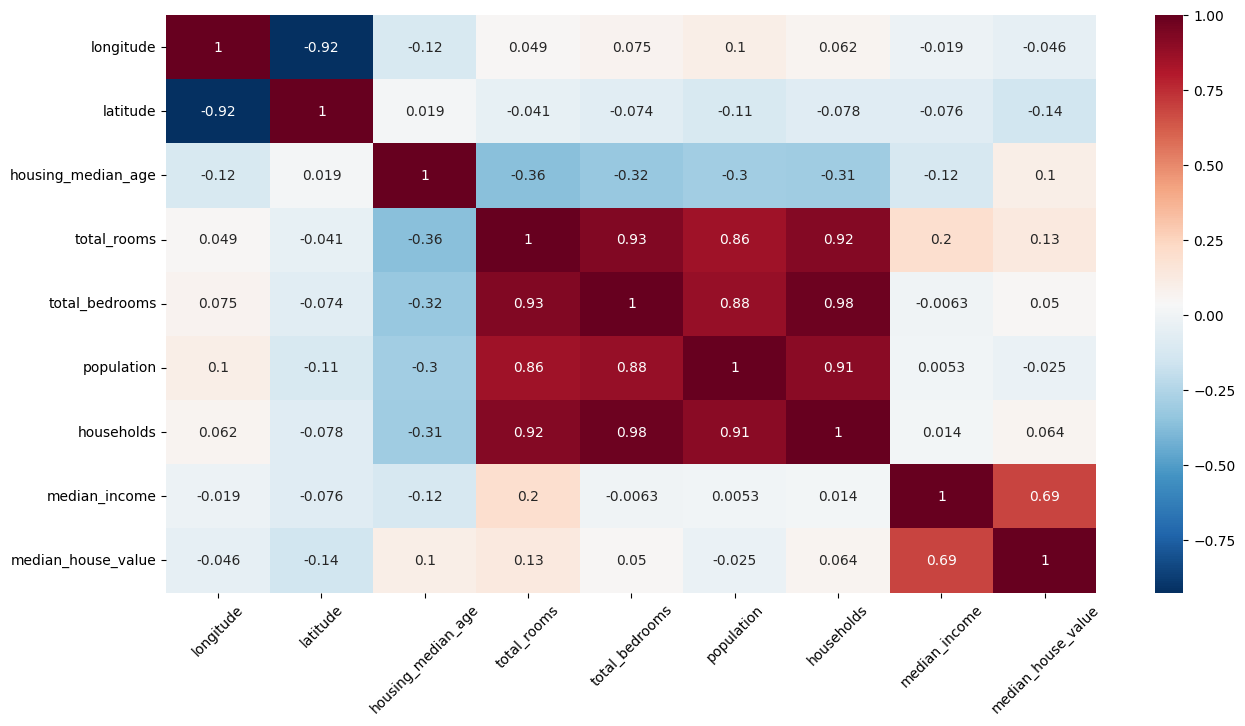

In [14]:
# To select only the numeric columns

numeric_columns = train_data.select_dtypes(include=['float64', 'int64']).columns

# Heatmap to view correlation

plt.figure(figsize=(15,7.5))
plt.xticks(rotation=45)
sb.heatmap(train_data[numeric_columns].corr(), annot=True, cmap='RdBu_r')
plt.show()

* The heatmap shows a positive correlation between the median income and the median house value, meaning that as income rises, so does the value of the home.
* A positive correlation is noticed between the number of rooms and median income, suggesting that those with higher incomes buy larger homes.

#### Logarithmic Transformation of Features in the Dataset

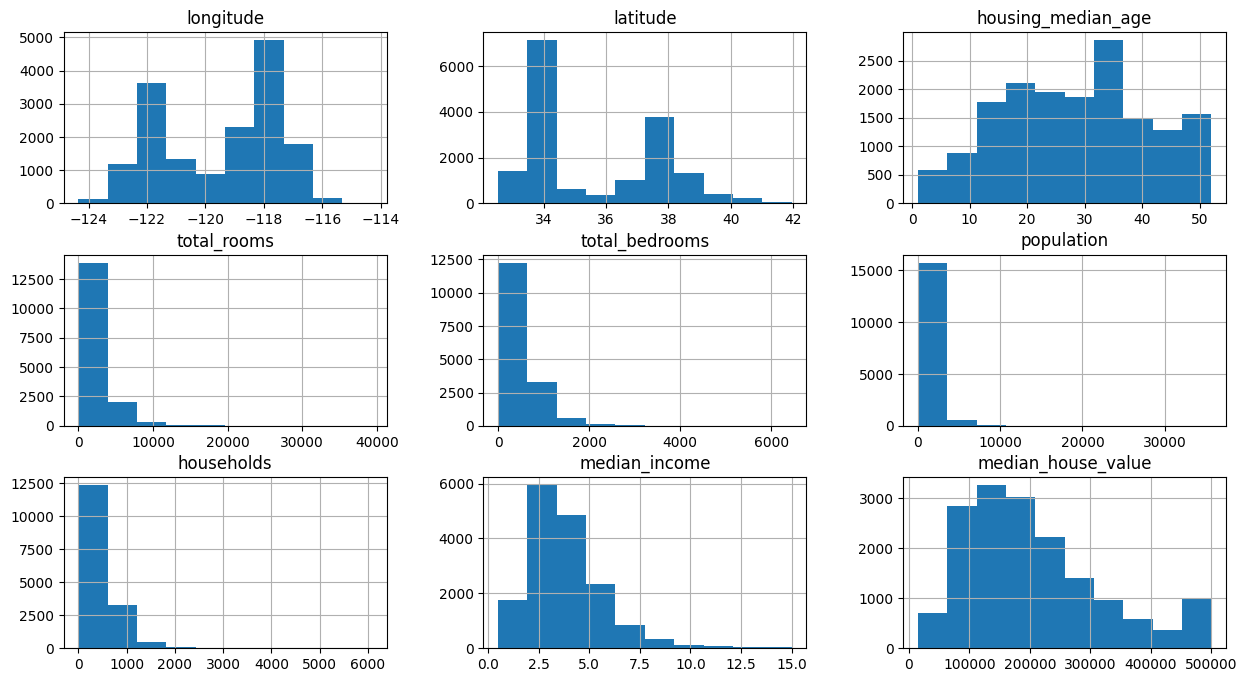

In [15]:
train_data.hist(figsize=(15,8));

* As seen above, some of the variables need to be stablized to maintain uniformity

In [16]:
# np.log is used to stabilize the variance across different values,especially when dealing with a large dynamic range.

train_data['total_rooms']=np.log(train_data['total_rooms']+1) #This is often done to handle cases where the original values are zero, as the logarithm of zero is undefined. Adding 1 ensures that the transformation is mathematically valid for all positive values.
train_data['total_bedrooms']=np.log(train_data['total_bedrooms']+1) 
train_data['population']=np.log(train_data['population']+1)  
train_data['households']=np.log(train_data['households']+1) 

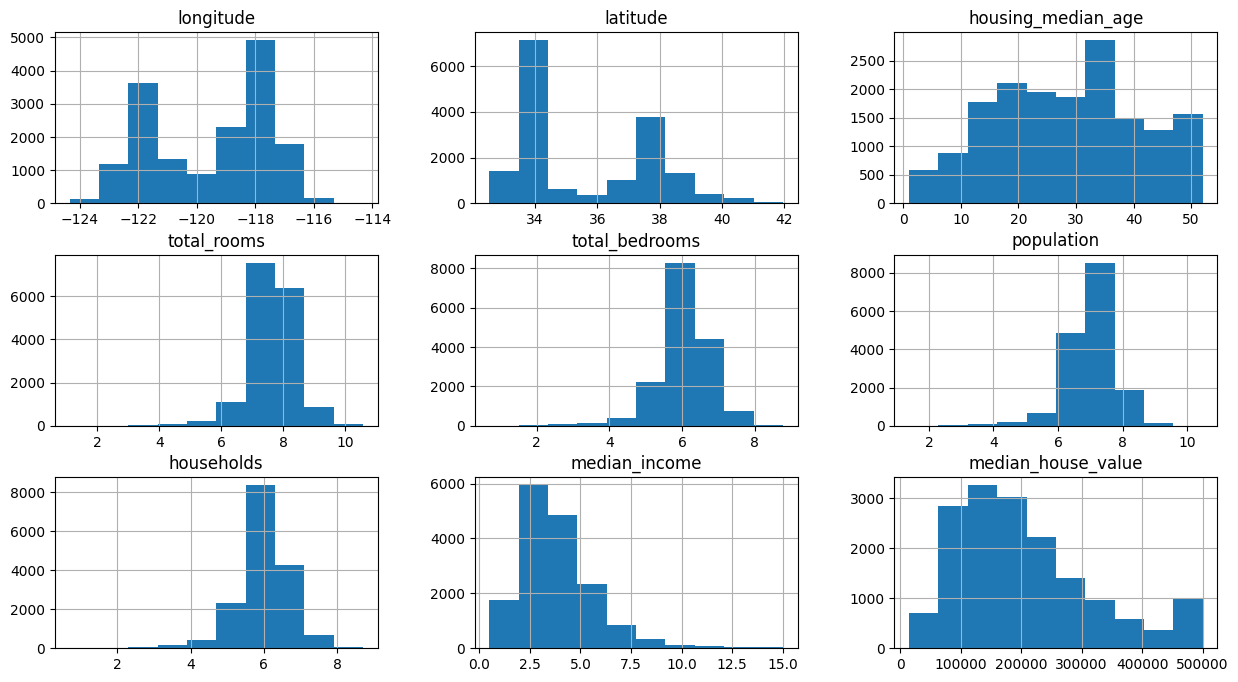

In [17]:
train_data.hist(figsize=(15,8));

#### Converting ocean proximity category to a numerical category 

In [18]:
# The value count of the ocean proximity category

train_data['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     7276
INLAND        5153
NEAR OCEAN    2103
NEAR BAY      1811
ISLAND           3
Name: count, dtype: int64

* As there are more than 2 values in the column, it is necessary to use dummy columns

In [19]:
pd.get_dummies(train_data.ocean_proximity).astype('int')

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
3732,1,0,0,0,0
15578,1,0,0,0,0
18116,1,0,0,0,0
119,0,0,0,1,0
3312,0,1,0,0,0
...,...,...,...,...,...
18976,0,1,0,0,0
17655,1,0,0,0,0
878,0,0,0,1,0
17228,1,0,0,0,0


In [20]:
train_data=train_data.join(pd.get_dummies(train_data.ocean_proximity).astype('int'))

In [21]:
train_data.drop('ocean_proximity',axis=1,inplace=True)

#### Heatmap to view the correlation between the median house value and the location.

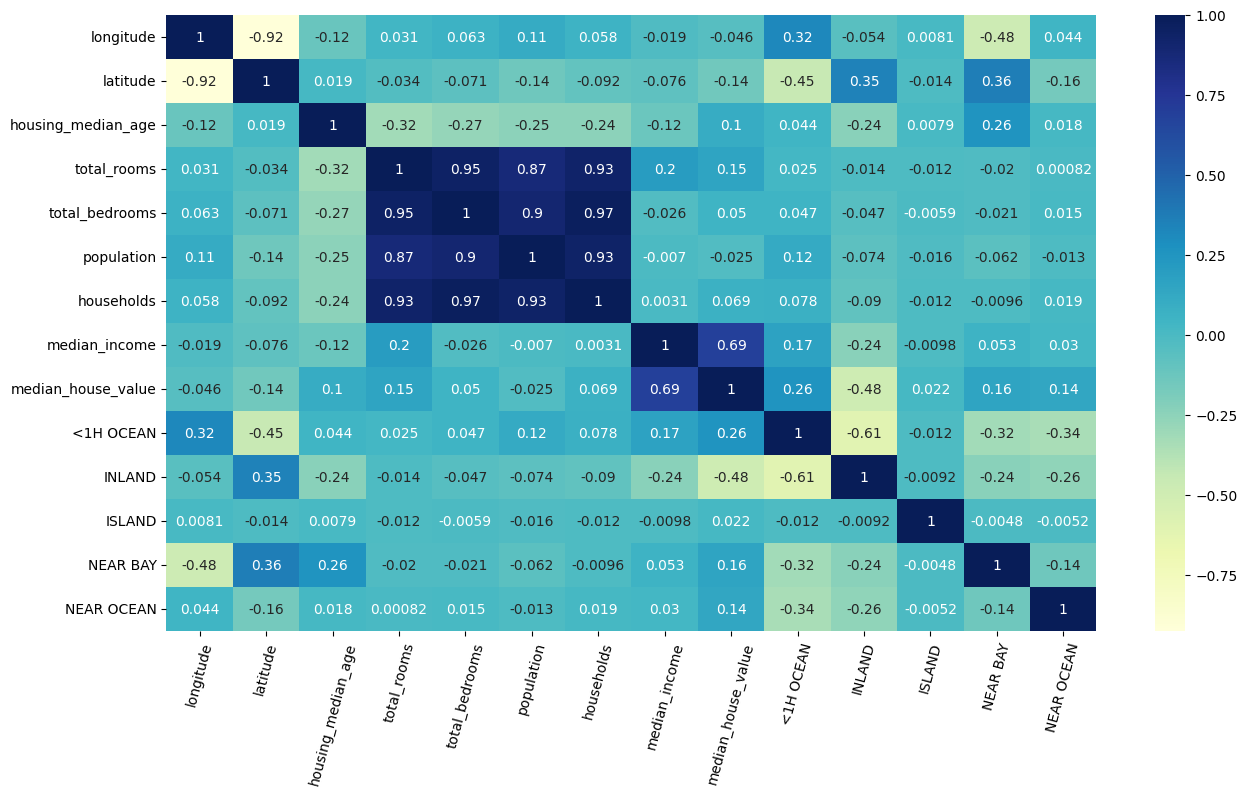

In [22]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=75)
sb.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')
plt.show()

* The map median house value has a positive correlation with <1H Ocean but has a negative correlation with Inland. 

#### Plot to view the geographical location accoring to the median house value

<Axes: xlabel='latitude', ylabel='longitude'>

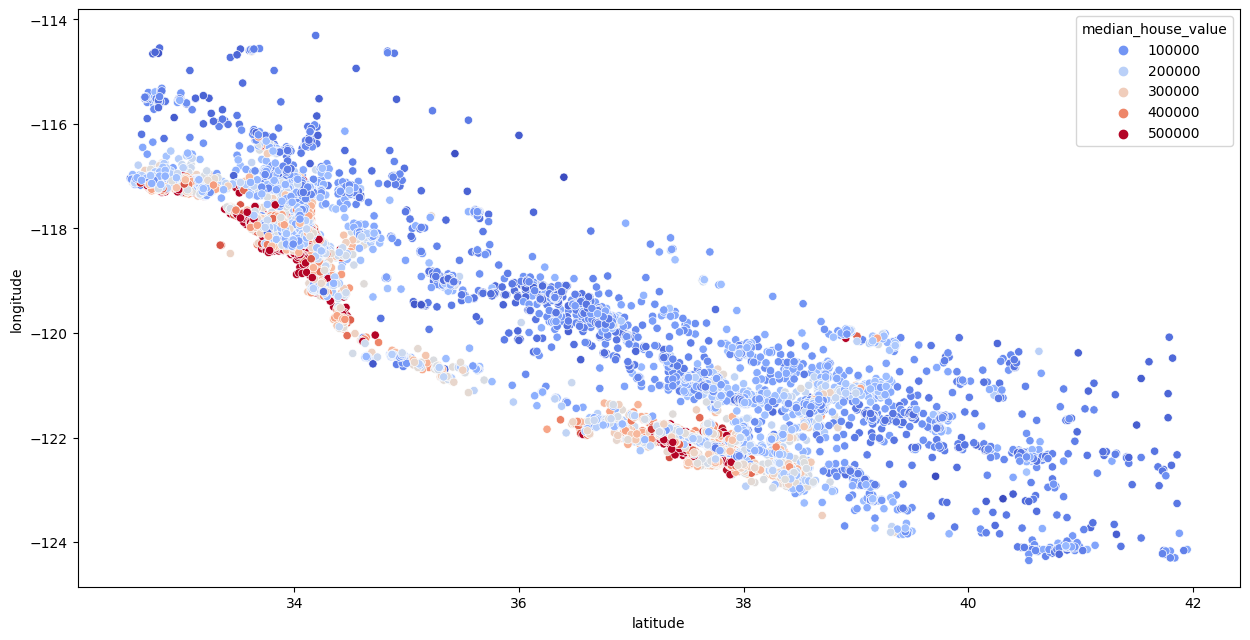

In [23]:
plt.figure(figsize=(15,7.5))
sb.scatterplot(x='latitude',y='longitude',data=train_data,hue='median_house_value',palette='coolwarm')

* The visual explains that those who live near the ocean have a higher median income than those who do not.

#### Linear Regression Model

In [24]:
# Splitting and training the data

from sklearn.linear_model import LinearRegression
X_train,y_train=train_data.drop(['median_house_value'],axis=1),train_data['median_house_value']
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [25]:
# To perform feature engineering with test data similar to train data

test_data=X_test.join(y_test)
test_data['total_rooms']=np.log(test_data['total_rooms']+1) #To avoid null values 1 is added
test_data['total_bedrooms']=np.log(test_data['total_bedrooms']+1) 
test_data['population']=np.log(test_data['population']+1)  
test_data['households']=np.log(test_data['households']+1)  

In [26]:
pd.get_dummies(test_data.ocean_proximity).astype('int')

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
13199,0,1,0,0,0
14181,0,0,0,0,1
10887,1,0,0,0,0
13157,0,1,0,0,0
10142,1,0,0,0,0
...,...,...,...,...,...
2430,0,1,0,0,0
8144,1,0,0,0,0
14383,0,0,0,0,1
271,0,0,0,1,0


In [27]:
# Performing the same steps for test data as done with the train data

test_data=test_data.join(pd.get_dummies(test_data.ocean_proximity).astype('int'))

In [28]:
# Deleteing the ocean_proximity column 

test_data.drop('ocean_proximity',axis=1,inplace=True)

In [29]:
# Splitting and test the test data

X_test,y_test=test_data.drop(['median_house_value'],axis=1),test_data['median_house_value']

In [30]:
reg.score(X_test,y_test)

0.6829819213881614

* The linear regression score is 0.68. This means that 68% of the variability in the dependent variable is explained by the independent variable in linear regression model.
* It is important to compare it with other models such as Random Forest to verify what scores higher

#### Random Forest Regressor

In [31]:
from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor()
forest.fit(X_train,y_train)

RandomForestRegressor()

In [32]:
forest.score(X_test,y_test)

0.8253213276346705

* The score 0.82 or 82% implies that the random forest model is a better fit to the data, explaining a higher proportion of the variance. 
* Random forest model is likely capturing more complex relationships in the data compared to the linear regression model.